## Feature Engineering and Feature selection

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import sklearn.metrics as metrics 
from sklearn.svm import LinearSVC,SVR
import seaborn as sns
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#Read a pickle file and load the data
import pickle
with open('final_df.pkl', 'rb') as file:
  df = pickle.load(file)

In [3]:
df

,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,...,weight_kg,nationality,draft_team,nba_played,playoff_played,unique_id,teams_each_player,leagues_each_player,age,position
0,Kelsey Barlow,27.0,789.4,179.0,414.0,68.0,203.0,81.0,98.0,55.0,...,91.0,United States,nan,0,0,fefc9789e91e4fc3b9b3e97506417ab2,1.0,1.0,29.514031,GF
1,Anthony Young,25.0,806.6,160.0,329.0,51.0,125.0,92.0,108.0,34.0,...,82.0,United States,nan,0,0,6354c53dfc7f4835a8215d86cc95be6c,1.0,1.0,31.694045,C
2,Pedro Barral,25.0,759.8,153.0,331.0,33.0,93.0,102.0,131.0,78.0,...,79.0,Argentina,nan,0,0,8ea081fb36ef4fd4a4698817ea5f66b4,1.0,1.0,26.834360,PG
3,Federico Mariani,24.0,856.3,120.0,277.0,44.0,112.0,135.0,151.0,55.0,...,80.0,Argentina,nan,0,0,906da9fbdb0648d8affdb0c40005e87c,1.0,1.0,28.350445,F
4,Caio De Souza Pacheco,21.0,582.7,134.0,296.0,30.0,104.0,110.0,145.0,72.0,...,86.0,Brazil,nan,0,0,cc33d7c5addd4e508aec7c7c4c3fac89,1.0,1.0,21.492129,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6473,Anuar Rahimshaikov,13.0,91.6,8.0,17.0,0.0,2.0,5.0,5.0,4.0,...,84.0,Ukraine,nan,0,0,46ae1416450d417f87b313b087864547,1.0,1.0,23.405886,SG
6474,Kyrylo Meshheryakov,15.0,127.0,7.0,28.0,2.0,13.0,3.0,4.0,5.0,...,83.0,Ukraine,nan,0,0,9495d3ff0f6649fb92fdc98863e7a6ad,1.0,1.0,25.010267,F
6475,Yaroslav Kadygrob,10.0,81.7,5.0,16.0,4.0,14.0,1.0,3.0,3.0,...,85.0,Ukraine,nan,0,0,21c3d427035f4c96b2eed4c4ddc8acd5,1.0,1.0,29.813142,G
6476,Ernesto Tkachuk,16.0,124.7,1.0,15.0,0.0,11.0,7.0,14.0,11.0,...,91.0,Ukraine,nan,0,0,c98a3ecd9078448a98a0f3097ef785c6,1.0,1.0,26.924709,PG


In [4]:
def divide_nan(new_column,column_1,column_2):
    df[new_column] = np.where(
        (df[column_1].isnull()| (df[column_1] == 0)),  # Condition for avoiding NaN
        0,  # What to assign if the condition is True
        df[column_1] / df[column_2]  # Perform division otherwise
    )
divide_nan('MIN PER GAME','MIN','GP')
divide_nan('FG%','FGM','FGA')
divide_nan('FT%','FTM','FTA')
divide_nan('Assist:Turnover Ratio','AST','TOV')


In [5]:
## Replace Infinity with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

In [6]:
#draft team- nan mapping and old teams 
team_mapping= {'New Jersey Nets':'Brooklyn Nets','Seattle SuperSonics':'Oklahoma City Thunder','Vancouver Grizzlies':'Memphis Grizzlies','nan':'Never drafted'}
df['draft_team']=df['draft_team'].replace(team_mapping)

/var/folders/wk/ktl5gmh17tqd4sd4__7vv3ww0000gn/T/ipykernel_24170/3131755839.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['draft_team']=df['draft_team'].replace(team_mapping)


In [7]:
df['draft_team'].value_counts()

draft_team
Never drafted             5894
Philadelphia Sixers         37
Atlanta Hawks               32
Boston Celtics              31
Denver Nuggets              24
Phoenix Suns                24
Utah Jazz                   23
Minnesota Timberwolves      21
San Antonio Spurs           21
Orlando Magic               21
Oklahoma City Thunder       21
Portland Trail Blazers      20
Charlotte Hornets           20
Brooklyn Nets               19
Washington Wizards          19
Milwaukee Bucks             19
Indiana Pacers              19
Toronto Raptors             18
Detroit Pistons             18
Memphis Grizzlies           17
Sacramento Kings            17
Los Angeles Lakers          17
New Orleans Pelicans        17
Houston Rockets             16
Chicago Bulls               16
Cleveland Cavaliers         15
New York Knicks             14
Miami Heat                  14
Golden State Warriors       12
Dallas Mavericks            11
Los Angeles Clippers        11
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Encode the species column
df['nationality'] = label_encoder.fit_transform(df['nationality'])
df['draft_team'] = label_encoder.fit_transform(df['draft_team'])
df['position'] = label_encoder.fit_transform(df['position'])
df['birth_month'] = label_encoder.fit_transform(df['birth_month'])

In [9]:
df = pd.get_dummies(df, columns=['nba_played','playoff_played'], drop_first=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 6478 non-null   object 
 1   GP                     6478 non-null   float64
 2   MIN                    6478 non-null   float64
 3   FGM                    6478 non-null   float64
 4   FGA                    6478 non-null   float64
 5   3PM                    6478 non-null   float64
 6   3PA                    6478 non-null   float64
 7   FTM                    6478 non-null   float64
 8   FTA                    6478 non-null   float64
 9   TOV                    6478 non-null   float64
 10  PF                     6478 non-null   float64
 11  ORB                    6478 non-null   float64
 12  DRB                    6478 non-null   float64
 13  REB                    6478 non-null   float64
 14  AST                    6478 non-null   float64
 15  STL 

In [11]:
del df['GP']
del df['MIN']
del df['FGM']
del df['FGA']
del df['3PM']
del df['FTM']
del df['FTA']
del df['TOV']
del df['AST']
del df['weight']

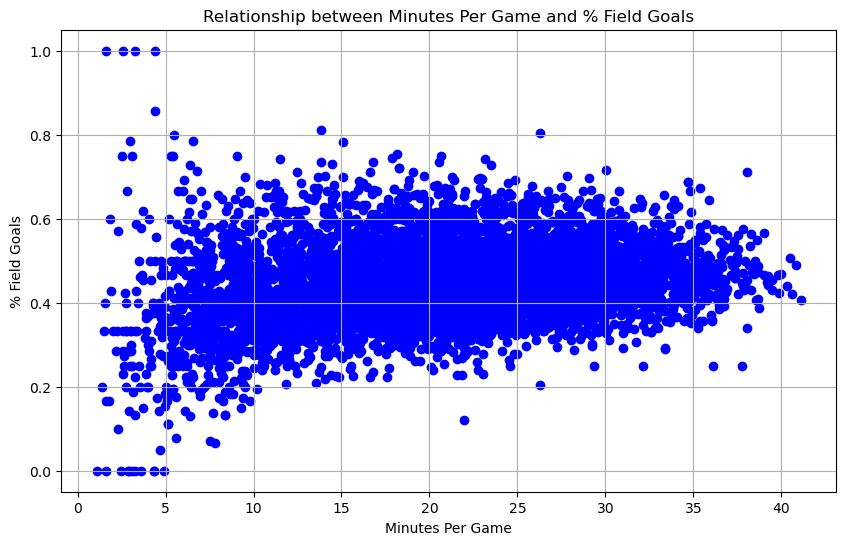

In [12]:

plot_df = df[['Player','MIN PER GAME','FG%']]
plt.figure(figsize=(10, 6))
plt.scatter(plot_df['MIN PER GAME'], plot_df['FG%'], color='blue')

# Add labels and title
plt.xlabel('Minutes Per Game')
plt.ylabel('% Field Goals')
plt.title('Relationship between Minutes Per Game and % Field Goals')


plt.grid(True)
plt.show()

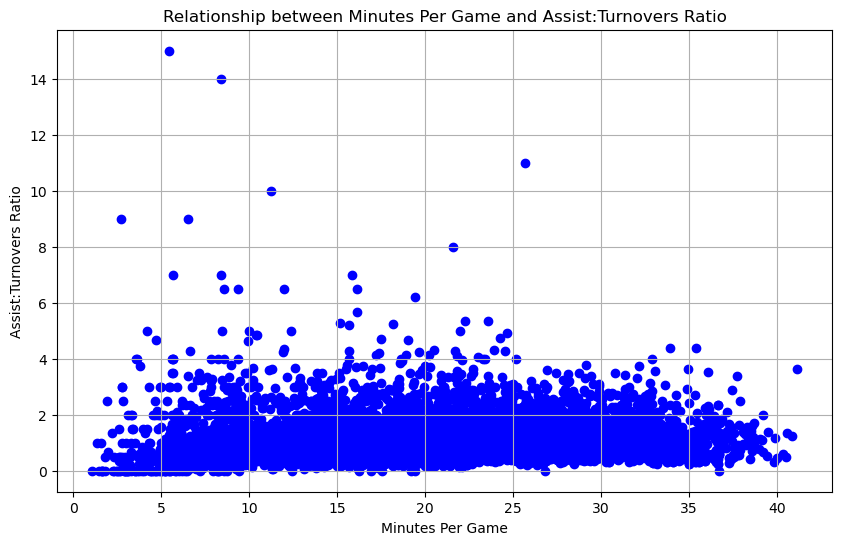

In [13]:

plt.figure(figsize=(10, 6))
plt.scatter(df['MIN PER GAME'], df['Assist:Turnover Ratio'], color='blue')

# Add labels and title
plt.xlabel('Minutes Per Game')
plt.ylabel('Assist:Turnovers Ratio')
plt.title('Relationship between Minutes Per Game and Assist:Turnovers Ratio')


plt.grid(True)
plt.show()

In [14]:
del df['Player']
del df['unique_id']

In [15]:
df.describe()

,3PA,PF,ORB,DRB,REB,STL,BLK,PTS,birth_year,birth_month,...,nationality,draft_team,teams_each_player,leagues_each_player,age,position,MIN PER GAME,FG%,FT%,Assist:Turnover Ratio
count,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,...,6478.000000,6478.000000,6478.0,6478.0,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000
mean,72.039055,53.221365,24.811979,70.046002,94.857981,19.507564,7.523001,237.888237,1992.698981,5.512658,...,55.809663,17.730781,1.0,1.0,27.414067,4.310898,21.153269,0.446774,0.702800,1.233536
std,83.538125,37.833151,27.410412,74.338742,97.825835,17.801407,13.633778,247.360987,4.773114,3.523460,...,28.100770,2.989831,0.0,0.0,3.453240,2.937932,8.025488,0.093581,0.175193,0.813395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,...,0.000000,0.000000,1.0,1.0,21.147159,0.000000,1.083333,0.000000,0.000000,0.000000
25%,18.000000,28.000000,8.000000,26.000000,36.000000,8.000000,1.000000,88.000000,1989.000000,3.000000,...,31.000000,18.000000,1.0,1.0,24.704312,1.000000,15.332792,0.391304,0.630435,0.727493
50%,50.000000,45.000000,16.000000,51.000000,68.000000,15.000000,3.000000,177.000000,1993.000000,5.000000,...,68.000000,18.000000,1.0,1.0,27.251198,4.000000,21.795644,0.443768,0.735294,1.067989
75%,95.000000,66.000000,32.000000,86.000000,118.000000,25.750000,8.000000,299.000000,1996.000000,8.000000,...,84.000000,18.000000,1.0,1.0,30.189596,7.000000,27.333333,0.500000,0.812500,1.550000
max,960.000000,290.000000,265.000000,813.000000,996.000000,145.000000,206.000000,2690.000000,2004.000000,12.000000,...,88.000000,30.000000,1.0,1.0,34.335387,9.000000,41.125000,1.000000,1.000000,15.000000


In [16]:
y = df['BLK']
X = df.drop(columns=['BLK'])

In [17]:
y.describe()

count    6478.000000
mean        7.523001
std        13.633778
min         0.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       206.000000
Name: BLK, dtype: float64

In [18]:

# Fit models and determine if a feature is selected (1) or not (0)
lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

svm = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

gb = GradientBoostingRegressor().fit(X, y)
gb_selected = (gb.feature_importances_ > 0).astype(int)

rf = RandomForestRegressor().fit(X, y)
rf_selected = (rf.feature_importances_ > 0).astype(int)

ada = AdaBoostRegressor().fit(X, y)
ada_selected = (ada.feature_importances_ > 0).astype(int)

# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'AdaBoost': ada_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso', 'SVM', 'GradientBoost', 'RandomForest','AdaBoost']].sum(axis=1)

# Output the results
print(selection_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.682e+04, tolerance: 1.204e+02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                  Feature  Lasso  SVM  GradientBoost  RandomForest  AdaBoost  \
0                     3PA      1    1              1             1         1   
1                      PF      1    1              1             1         1   
2                     ORB      1    1              1             1         1   
3                     DRB      1    1              1             1         1   
4                     REB      1    1              1             1         1   
5                     STL      1    0              1             1         1   
6                     PTS      1    1              1             1         1   
7              birth_year      1    1              1             1         1   
8             birth_month      1    0              1             1         1   
9               height_cm      1    1              1             1         1   
10              weight_kg      1    1              1             1         1   
11            nationality      1    1   

#### Selected variables - recommended by 4 or more models 

In [19]:
 #Selecting variables with a sum of selections >= 4
final_var = selection_df[selection_df['Sum'] >= 4]['Feature'].tolist()
df_model = df[final_var].copy()
df_model['BLK'] = df['BLK'].copy()

# Output the result to verify
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   3PA                    6478 non-null   float64
 1   PF                     6478 non-null   float64
 2   ORB                    6478 non-null   float64
 3   DRB                    6478 non-null   float64
 4   REB                    6478 non-null   float64
 5   STL                    6478 non-null   float64
 6   PTS                    6478 non-null   float64
 7   birth_year             6478 non-null   float64
 8   birth_month            6478 non-null   int64  
 9   height_cm              6478 non-null   float64
 10  weight_kg              6478 non-null   float64
 11  nationality            6478 non-null   int64  
 12  draft_team             6478 non-null   int64  
 13  age                    6478 non-null   float64
 14  position               6478 non-null   int64  
 15  MIN 

In [20]:
df_model.to_csv('df_model.csv')

### Setting proportion for Train, Test, Dev 

In [21]:
from sklearn.model_selection import train_test_split

# Assuming df_model is already defined and contains the necessary features and target variable

# Define the target and feature set
X = df_model.drop(columns=['BLK'])
y = df_model['BLK']

# Total number of samples
total_samples = len(df_model)

# First split: training and temporary (test + dev)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: testing and development (dev)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Calculate percentages
train_percent = (X_train.shape[0] / total_samples) * 100
dev_percent = (X_dev.shape[0] / total_samples) * 100
test_percent = (X_test.shape[0] / total_samples) * 100

# Output the sizes of each set in percentages
print(f"Training set size: {train_percent:.2f}%")
print(f"Validation (Dev) set size: {dev_percent:.2f}%")
print(f"Testing set size: {test_percent:.2f}%")

Training set size: 69.99%
Validation (Dev) set size: 15.00%
Testing set size: 15.00%


In [ ]:
null_counts = df_model.isnull().sum()
print(null_counts)

## Regression Models

In [27]:
models_list = pd.DataFrame()
models_list_dev = pd.DataFrame()
models_list_test = pd.DataFrame()

In [28]:
X = df_model.loc[:,df_model.columns != 'BLK']
y = df_model['BLK']

In [29]:
def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res


### Linear Regression

In [30]:
mod1 = LinearRegression()
mod1.fit(X_train, y_train)

# Predict on training and development sets
pred1 = mod1.predict(X_train)
pred1_dev = mod1.predict(X_dev)

# Ensure there are no zero or negative values for RMSLE calculation
pred1_pos = np.maximum(pred1, 0)  
pred1_dev_pos = np.maximum(pred1_dev, 0)

In [31]:
# Store evaluation metrics for Linear Regression model
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred1_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

model_dict_dev = {'model_dev': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred1_dev_pos)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='BLK'>

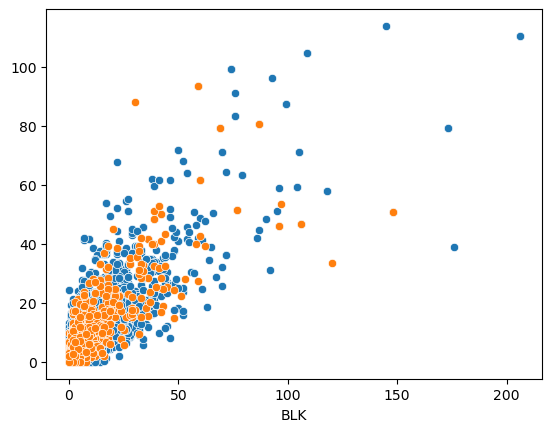

In [33]:
# Plot predicted vs. actual values for Linear Regression model
sns.scatterplot(x=y_train, y=pred1_pos)
sns.scatterplot(x=y_dev, y=pred1_dev_pos)

### Decision Tree

In [34]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [35]:
# Predict on training and development sets
pred2 = mod2.predict(X_train)
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

pred2_dev = mod2.predict(X_dev)
model_dict_dev = {'model_dev': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred2_dev)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='BLK'>

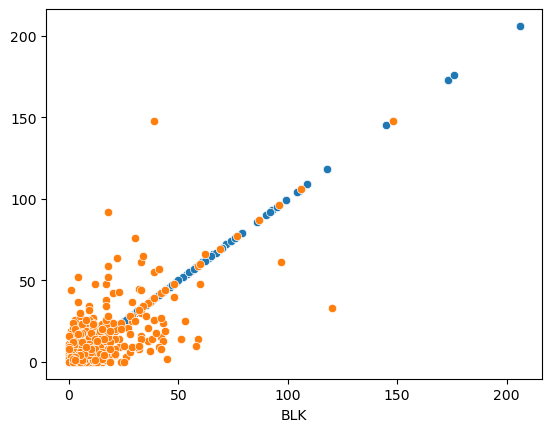

In [37]:
# Plot predicted vs. actual values for Decision Tree model
sns.scatterplot(x=y_train, y=pred2)
sns.scatterplot(x=y_dev, y=pred2_dev)

## Random Forest

In [38]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [39]:
# Predict on training and development sets
pred3 = mod3.predict(X_train)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

pred3_dev = mod3.predict(X_dev)
model_dict_dev = {'model_dev': "RandomForest"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred3_dev)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='BLK'>

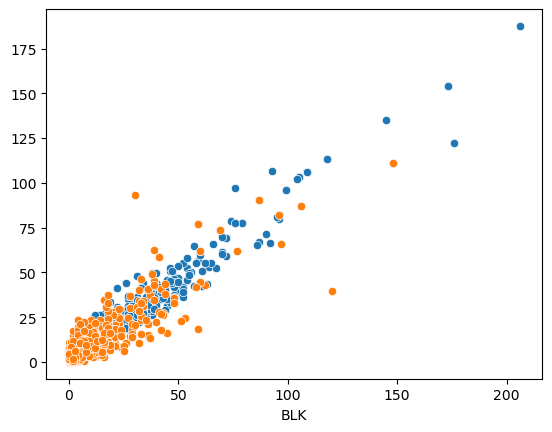

In [40]:
# Plot predicted vs. actual values for Random Forest model
sns.scatterplot(x=y_train, y=pred3)
sns.scatterplot(x=y_dev, y=pred3_dev)

### Adaptive Boosting (ADABoost)

In [41]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [42]:
# Predict on training and development sets
pred4 = mod4.predict(X_train)
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

pred4_dev = mod4.predict(X_dev)
model_dict_dev = {'model_dev': "ADABoost"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred4_dev)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='BLK'>

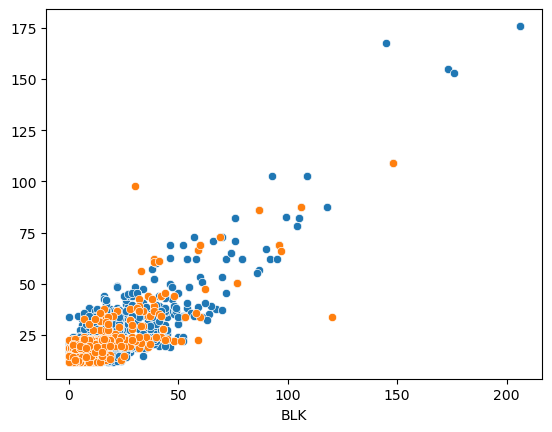

In [43]:
# Plot predicted vs. actual values for AdaBoost model
sns.scatterplot(x=y_train, y=pred4)
sns.scatterplot(x=y_dev, y=pred4_dev)

## Gradient Boosting Machine (GBM)

In [44]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [46]:
# Predict on training and development sets
pred5 = mod5.predict(X_train)
pred5_dev = mod5.predict(X_dev)

# Ensure there are no zero or negative values for RMSLE calculation
pred5_pos = np.maximum(pred5, 0)  
pred5_dev_pos = np.maximum(pred5_dev, 0) 

model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred5_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

model_dict_dev = {'model_dev': "GBM"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred5_dev_pos)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='BLK'>

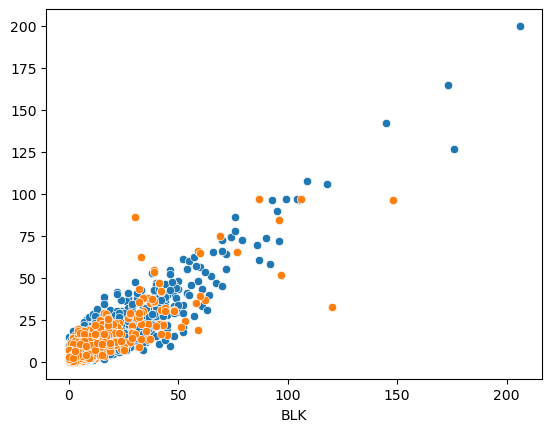

In [48]:
# Plot predicted vs. actual values for Gradient Boosting model
sns.scatterplot(x=y_train, y=pred5_pos)
sns.scatterplot(x=y_dev, y=pred5_dev_pos)

## Support Vector Machine (SVM)

In [49]:
mod6 = SVR()
mod6.fit(X_train, y_train)

SVR()

In [61]:
pred6 = mod6.predict(X_train)
pred6_dev = mod6.predict(X_dev)
# Ensure there are no zero or negative values for RMSLE calculation
pred6_pos = np.maximum(pred6, 0)  
pred6_dev_pos = np.maximum(pred6_dev, 0) 

# Predict on training and development sets

model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred6_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

pred6_dev = mod6.predict(X_dev)
model_dict_dev = {'model_dev': "SVM"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred6_dev_pos)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)


<Axes: xlabel='BLK'>

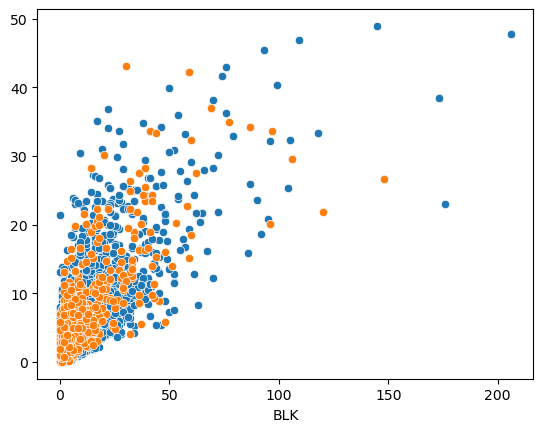

In [62]:
# Plot predicted vs. actual values for SVM model
sns.scatterplot(x=y_train, y=pred6_pos)
sns.scatterplot(x=y_dev, y=pred6_dev_pos)

## XGBoost Regressor

In [63]:
mod7= xgb.XGBRegressor()
mod7.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [65]:
# Predict on training and development sets
pred7 = mod7.predict(X_train)
pred7_dev = mod7.predict(X_dev)

# Ensure there are no zero or negative values for RMSLE calculation
pred7_pos = np.maximum(pred7, 0)  
pred7_dev_pos = np.maximum(pred7_dev, 0)  


# Store evaluation metrics for XGBoost model
model_dict = {'model': "XGBOOST"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred7_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

model_dict_dev = {'model_dev': "XGBOOST"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred7_dev_pos)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='BLK'>

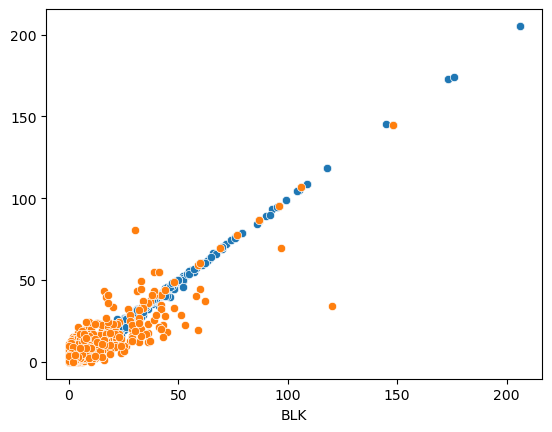

In [67]:
# Plot predicted vs. actual values for XGBoost model
sns.scatterplot(x=y_train, y=pred7_pos)
sns.scatterplot(x=y_dev, y=pred7_dev_pos)

## Model Selection

In [68]:
models_list.sort_values('MAE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
6,XGBOOST,1.999319,1.413973,0.999376,0.370197
2,RandomForest,7.230920,2.689037,1.412764,0.333790
4,GBM,26.001312,5.099148,3.203990,0.656633
0,Linear Regression,61.484691,7.841217,4.143599,0.755126
5,SVM,103.610857,10.178942,4.478042,0.724039
3,ADABoost,132.331776,11.503555,10.641797,1.607593


In [69]:
models_list.sort_values('RMSE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
6,XGBOOST,1.999319,1.413973,0.999376,0.370197
2,RandomForest,7.230920,2.689037,1.412764,0.333790
4,GBM,26.001312,5.099148,3.203990,0.656633
0,Linear Regression,61.484691,7.841217,4.143599,0.755126
5,SVM,103.610857,10.178942,4.478042,0.724039
3,ADABoost,132.331776,11.503555,10.641797,1.607593


In [70]:
models_list.sort_values('MSE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
6,XGBOOST,1.999319,1.413973,0.999376,0.370197
2,RandomForest,7.230920,2.689037,1.412764,0.333790
4,GBM,26.001312,5.099148,3.203990,0.656633
0,Linear Regression,61.484691,7.841217,4.143599,0.755126
5,SVM,103.610857,10.178942,4.478042,0.724039
3,ADABoost,132.331776,11.503555,10.641797,1.607593


In [72]:
models_list_dev.sort_values('MSE')

,model_dev,MSE,RMSE,MAE,RMSLE
6,XGBOOST,43.047653,6.561071,3.583882,0.707479
2,RandomForest,43.875157,6.623832,3.641255,0.677483
4,GBM,45.838448,6.770410,3.581582,0.669387
0,Linear Regression,63.060640,7.941073,3.987498,0.732955
5,SVM,95.352661,9.764869,4.469289,0.709884
1,Decision Tree,97.374486,9.867851,5.047325,0.928777
3,ADABoost,144.424943,12.017693,10.747556,1.621186


## Random Forest Finetuning

In [79]:
# Define the parameter grid to search
rf_param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}


# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator=mod3, param_grid=rf_param_grid, 
                           cv=3, n_jobs=-1, verbose=2,scoring='neg_mean_squared_error' )
#Verbose - level of details that will be provided in each iteration
# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
257 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [80]:
print("Best Parameters (RF):", rf_grid_search.best_params_)
print("Best Score (MSE):", -rf_grid_search.best_score_)

Best Parameters (RF): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score (MSE): 59.44895719093899


In [81]:
# Predict on the training data using the best Random Forest model
pred8 = rf_grid_search.predict(X_train)

# Replace negative predictions with zero for development data
pred8_pos = np.maximum(pred8, 0)

# Add the model's training performance metrics to models_list
model_dict = {'model': "rf_FT"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred8_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

# Predict on the development data using the best Random Forest model
pred8_dev = rf_grid_search.predict(X_dev)

# Replace negative predictions with zero for development data
pred8_dev_pos = np.maximum(pred8_dev, 0)

# Add the model's development performance metrics to models_list_dev
model_dict_dev = {'model_dev': "rf_FT"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred8_dev_pos)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, m

## XGBoost Finetuning

In [83]:
grid_search_xgb = GridSearchCV(
    estimator=mod7,  # XGBoost regressor model
    param_grid=rf_param_grid,  # Hyperparameter grid to search
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    verbose=2,  # Detailed output for each iteration
    scoring='neg_mean_squared_error'  # Evaluation metric: negative mean squared error
)
# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score (convert negative MSE to positive MSE)
print("Best Parameters (XGB):", grid_search_xgb.best_params_)
print("Best Score (MSE):", -grid_search_xgb.best_score_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[12:41:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[12:41:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings

In [84]:
# Predict on the training data using the best XGBoost model
pred9 = grid_search_xgb.predict(X_train)

# Replace any negative predictions with zero (since target cannot be negative)
pred9_pos = np.maximum(pred9, 0)

# Add the model's training performance metrics to models_list
model_dict = {'model': "XGB_FT"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred9_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

[12:45:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.6s
[12:45:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some

In [85]:
# Predict on the development data using the best XGBoost model
pred9_dev = grid_search_xgb.predict(X_dev)

# Replace negative predictions with zero for development data
pred9_dev_pos = np.maximum(pred9_dev, 0)

# Add the model's development performance metrics to models_list_dev
model_dict_dev = {'model_dev': "XGB_FT"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred9_dev_pos)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

In [88]:
models_list.sort_values('RMSE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
6,XGBOOST,1.999319,1.413973,0.999376,0.370197
2,RandomForest,7.230920,2.689037,1.412764,0.333790
8,XGB_FT,18.941144,4.352142,2.808538,0.622651
7,rf_FT,19.087576,4.368933,2.691210,0.585882
4,GBM,26.001312,5.099148,3.203990,0.656633
0,Linear Regression,61.484691,7.841217,4.143599,0.755126
5,SVM,103.610857,10.178942,4.478042,0.724039
3,ADABoost,132.331776,11.503555,10.641797,1.607593


In [89]:
models_list_dev.sort_values('RMSE')

,model_dev,MSE,RMSE,MAE,RMSLE
6,XGBOOST,43.047653,6.561071,3.583882,0.707479
8,XGB_FT,43.331328,6.582654,3.604492,0.671376
2,RandomForest,43.875157,6.623832,3.641255,0.677483
7,rf_FT,45.780202,6.766107,3.646406,0.673804
4,GBM,45.838448,6.770410,3.581582,0.669387
0,Linear Regression,63.060640,7.941073,3.987498,0.732955
5,SVM,95.352661,9.764869,4.469289,0.709884
1,Decision Tree,97.374486,9.867851,5.047325,0.928777
3,ADABoost,144.424943,12.017693,10.747556,1.621186


In [94]:
##Asumes XGBOOST is the chosen one 
final_model = xgb.XGBRegressor()
final_model.fit(X_test, y_test)
final_model


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [95]:
# Predict on the test data
pred_test = final_model.predict(X_test)

# Ensure predictions are non-negative (if applicable)
pred_test_pos = np.maximum(pred_test, 0)  

# Calculate and print metrics for the test set
test_metrics = regressionMetrics(y_test, pred_test_pos)
print("Test Metrics:", test_metrics)


Test Metrics: {'MSE': 0.011691187818573026, 'RMSE': 0.10812579626792593, 'MAE': 0.07352666321369616, 'RMSLE': 0.044127979099213545}


Text(0.5, 1.0, 'Predicted vs. Actual-XGBRegressor Model')

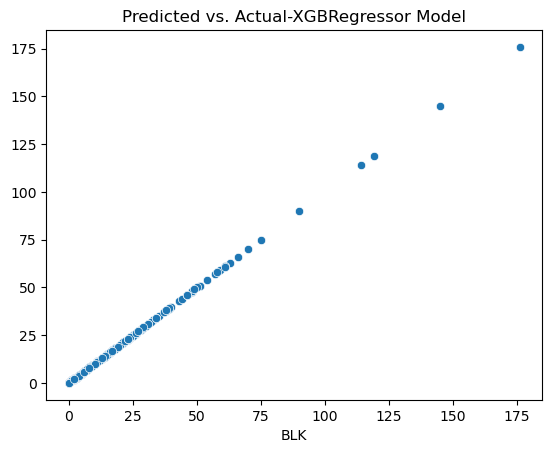

In [101]:
# Plot predicted vs. actual values
plot = sns.scatterplot(x=y_test, y=pred_test_pos)
plot.set_title('Predicted vs. Actual-XGBRegressor Model')

In [102]:
##Asumes Random Forest is the chosen one 
final_model = RandomForestRegressor(random_state=1)
final_model.fit(X_test, y_test)
final_model

RandomForestRegressor(random_state=1)

In [103]:
# Predict on the test data
pred_test = final_model.predict(X_test)

# Ensure predictions are non-negative (if applicable)
pred_test_pos = np.maximum(pred_test, 0)  

# Calculate and print metrics for the test set
test_metrics = regressionMetrics(y_test, pred_test_pos)
print("Test Metrics:", test_metrics)

Test Metrics: {'MSE': 12.471056069958848, 'RMSE': 3.531438243826281, 'MAE': 1.6864917695473252, 'RMSLE': 0.3398621428761975}


Text(0.5, 1.0, 'Predicted vs. Actual- RandomForestRegressor model ')

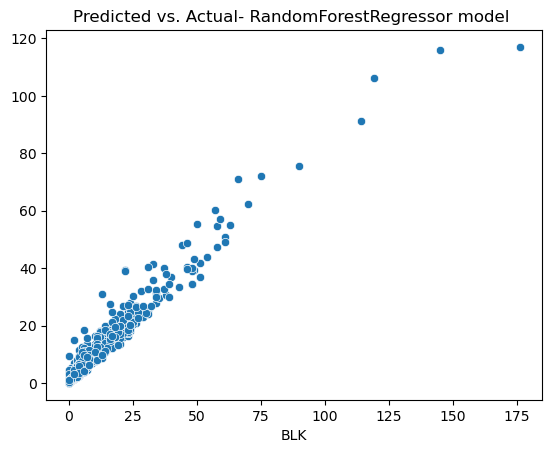

In [112]:
# Plot predicted vs. actual values
plot = sns.scatterplot(x=y_test, y=pred_test_pos)
plot.set_title('Predicted vs. Actual- RandomForestRegressor model ')

<Axes: xlabel='BLK'>

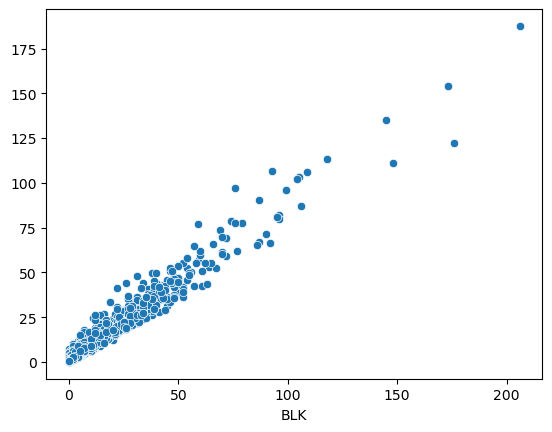

In [114]:
sns.scatterplot(x=y_train, y=pred3)
